In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net_heat = ContTempNetwork.load('fig3_growing_network300')

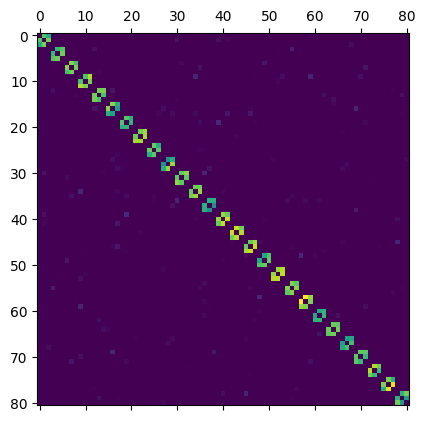

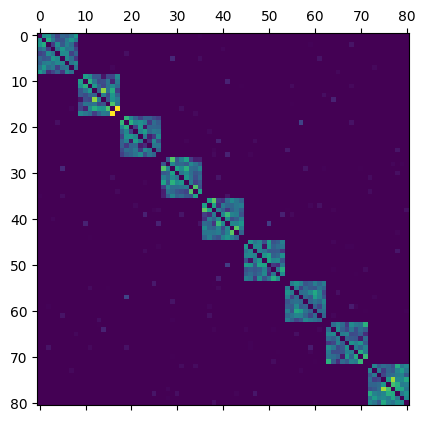

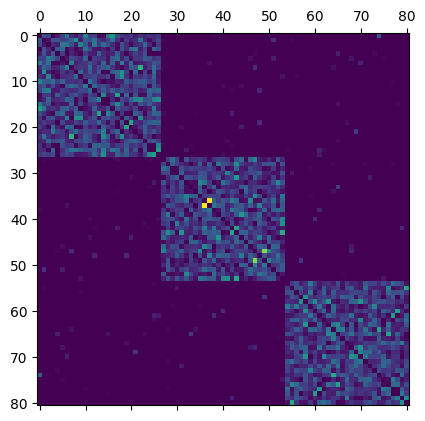

In [3]:
plt.matshow(net_heat.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray())
#plt.savefig('/home/b/skoove/Desktop/growing300/aggregating1.png', format='png', dpi=300)
plt.matshow(net_heat.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray())
#plt.savefig('/home/b/skoove/Desktop/growing300/aggregating2.png', format='png', dpi=300)
plt.matshow(net_heat.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray())
#plt.savefig('/home/b/skoove/Desktop/growing300/aggregating3.png', format='png', dpi=300)

## Conditional Entropy

In [4]:
selected_lamdas = np.logspace(-3,1,10)
sample_times = list(np.arange(0, len(net_heat.times), 10))

In [5]:
Conditional_S_selected = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/growing_experiment300_temporal_rw/conditional_S_selected/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected.append(S_rate['S_rate'][f'{lamda:.11f}']) #(S[list(S.keys))[0]][0])

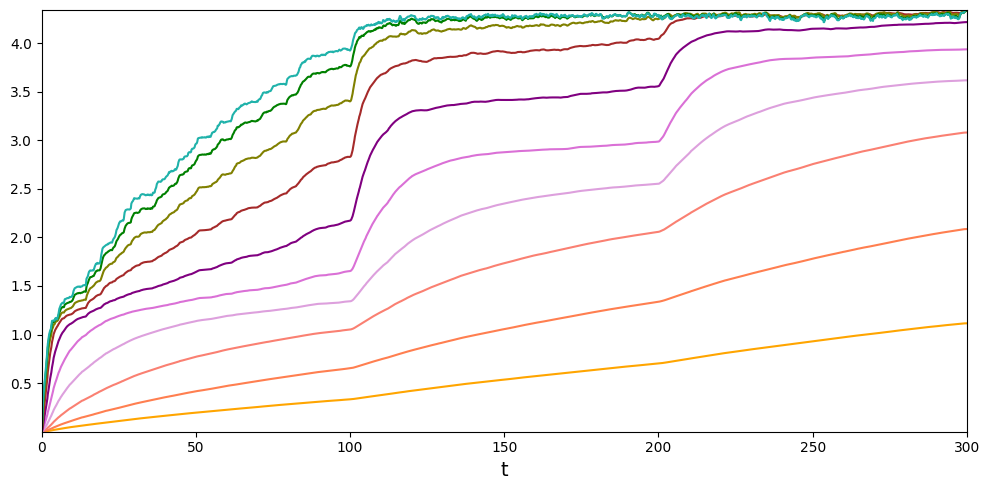

In [6]:
fig, axs = plt.subplots(1,1, sharex=False, figsize=(10, 5))

list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

####### Fourth Plot

for i, lamda in enumerate(selected_lamdas):
    axs.plot(net_heat.times[sample_times], Conditional_S_selected[i], color = list_colors[i], label='lamda = ' + f'{lamda:.11f}')


axs.set_xlabel('t', fontsize = 14)
axs.set_xlim([0, 300])
#axs.set_ylabel('Sh')
ymin = np.min(Conditional_S_selected[0])
ymax = np.max(Conditional_S_selected[-1])
axs.set_ylim([ymin, ymax])
#axs.set_ylabel(r'$\frac{\partial S(\lambda, t_{end})}{\partial \log\lambda}$', color=color)
axs.tick_params(axis='y')



#plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))

#fig.suptitle("Conditional Entropy H(pt | p0)", fontsize=12)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#fig.subplots_adjust(top=0.88) # # Tight layout requires the title to be spaced accordingly
#plt.savefig('/home/b/skoove/Desktop/growing300/growing300_conditionalH0_300.png', format='png', dpi=600)

plt.show()

In [8]:
N = net_heat.num_nodes
H = lambda t: t*np.exp(-t) - (1-np.exp(-t))*(np.log(1-np.exp(-t)) - np.log(N-1))

In [11]:
len(S)

1860

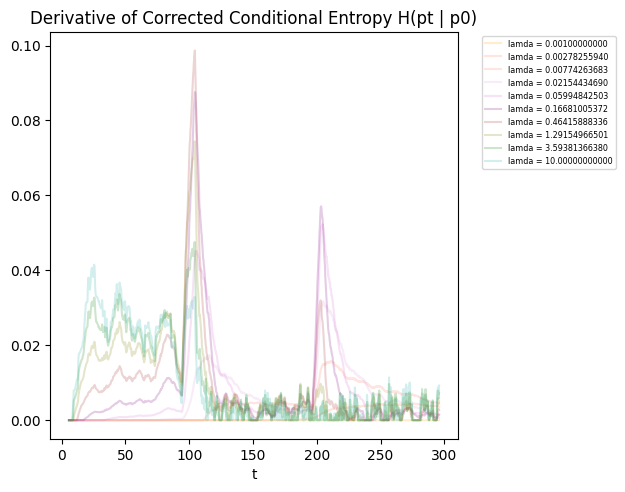

In [16]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

smoothing_window = 50
for i, lamda in enumerate(selected_lamdas):
    S = Conditional_S_selected[i]
    dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
    dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)
# Q2 = derivative(S2, between_lamdas_vNS)
    plt.plot(net_heat.times[sample_times][smoothing_window // 2:- (smoothing_window // 2)], np.maximum(0,dS_dt), color = list_colors[i], alpha = 0.20, label='lamda = ' + f'{lamda:.11f}')
    plt.xlabel('t')


plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Derivative of Corrected Conditional Entropy H(pt | p0)')
#plt.savefig('/home/b/skoove/Desktop/primary_school/ma10_derivative_corrected_conditionalH.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

## Plot NetSci2025

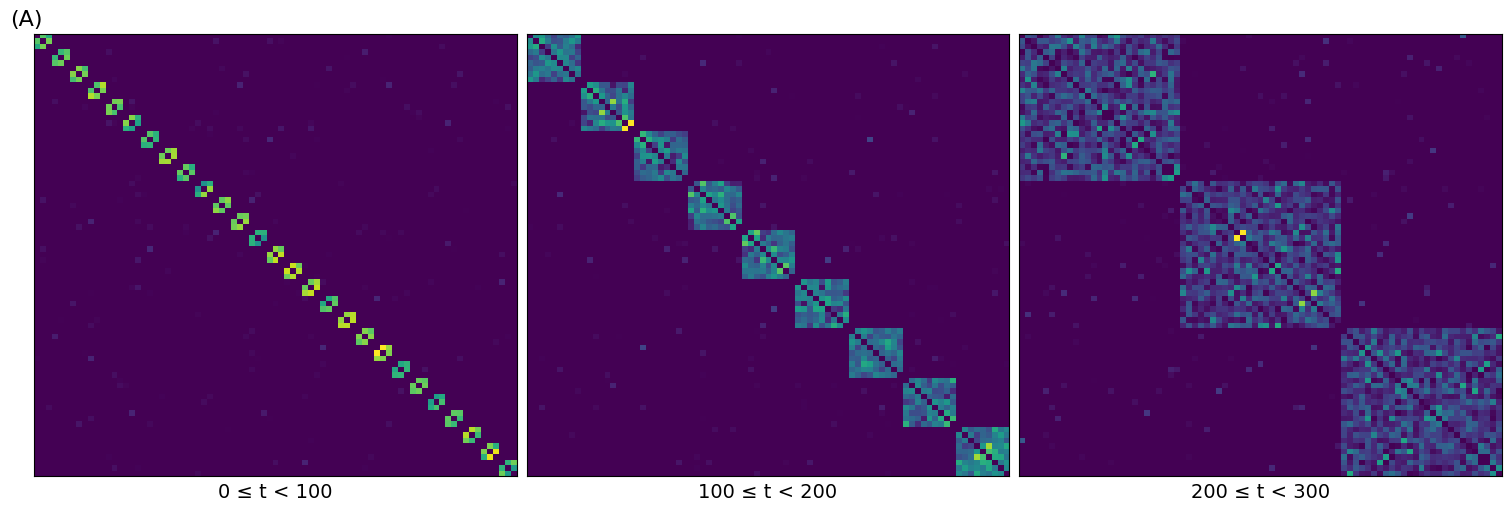

In [59]:
# Example matrices for demonstration
matrix1 = net_heat.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2 = net_heat.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3 = net_heat.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Define the time intervals for the x-axis
time_intervals = [(0, 100), (100, 200), (200, 300)]

# Plot each matrix on a subplot
for i, (ax, matrix, t_range) in enumerate(zip(axes, [matrix1, matrix2, matrix3], time_intervals)):
    im = ax.matshow(matrix, aspect='auto')  # Plot the matrix
    ax.set_xticks([])  # Hide x-ticks
    ax.set_yticks([])  # Hide y-ticks
    ax.set_xlabel(f"{t_range[0]} ≤ t < {t_range[1]}", fontsize=14)  # Add the time interval below each graph

# Add '(A)' to the top-left plot
axes[0].text(-0.05, 1.02, '(A)', transform=axes[0].transAxes, fontsize=16)

# Remove the colorbar by omitting it completely

# Display the plot
plt.show()


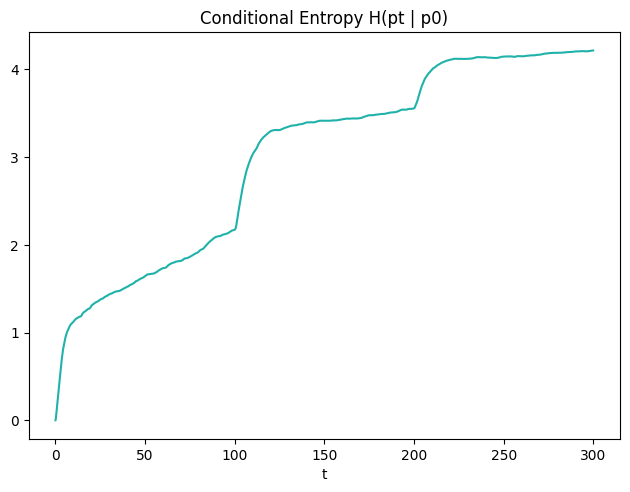

In [63]:
#Plot 5
color = 'lightseagreen'
index = 5

lamda = selected_lamdas[index]

smoothing_window = 50
S = Conditional_S_selected[index]

plt.plot(net_heat.times[sample_times], S, color = color, alpha = 1)
plt.xlabel('t')


#plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Conditional Entropy H(pt | p0)')
#plt.savefig('/home/b/skoove/Desktop/primary_school/ma10_derivative_corrected_conditionalH.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
from scipy.signal import argrelextrema

def find_local_maxima(array, window_size):
    """
    Find the indices of local maxima in a NumPy array based on a given neighborhood size.
    
    Parameters:
        array (np.ndarray): Input array.
        window_size (int): Size of the neighborhood to consider for determining local maxima.
    
    Returns:
        np.ndarray: Indices of the local maxima.
    """
    # Define the order (half the window size)
    order = window_size // 2
    
    # Find indices of local maxima
    local_maxima_indices = argrelextrema(array, comparator=np.greater, order=order)[0]
    
    return local_maxima_indices

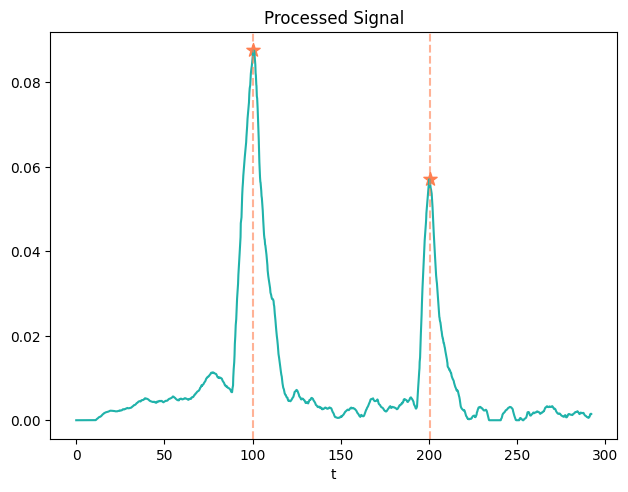

In [65]:
#Plot 5
color = 'lightseagreen'
index = 5

smoothing_window = 50
lamda = selected_lamdas[index]

S = Conditional_S_selected[index]
dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)
# Q2 = derivative(S2, between_lamdas_vNS)
plt.plot(net_heat.times[sample_times][:- (smoothing_window)], np.maximum(0,dS_dt), color = color, alpha = 1)

local_window = 1000
maxima = find_local_maxima(np.array(dS_dt), local_window)
maxima += 0

plt.scatter(net_heat.times[sample_times][maxima], np.maximum(0,dS_dt)[maxima], color="coral", marker="*", s=100, label="Local maxima")  # Add stars at local maxima
for idx in maxima:
    plt.axvline(x=net_heat.times[sample_times][idx], color="coral", linestyle="--", alpha=0.6)  # Add vertical lines

plt.xlabel('t')
#plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Processed Signal')
#plt.savefig('/home/b/skoove/Desktop/primary_school/ma10_derivative_corrected_conditionalH.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

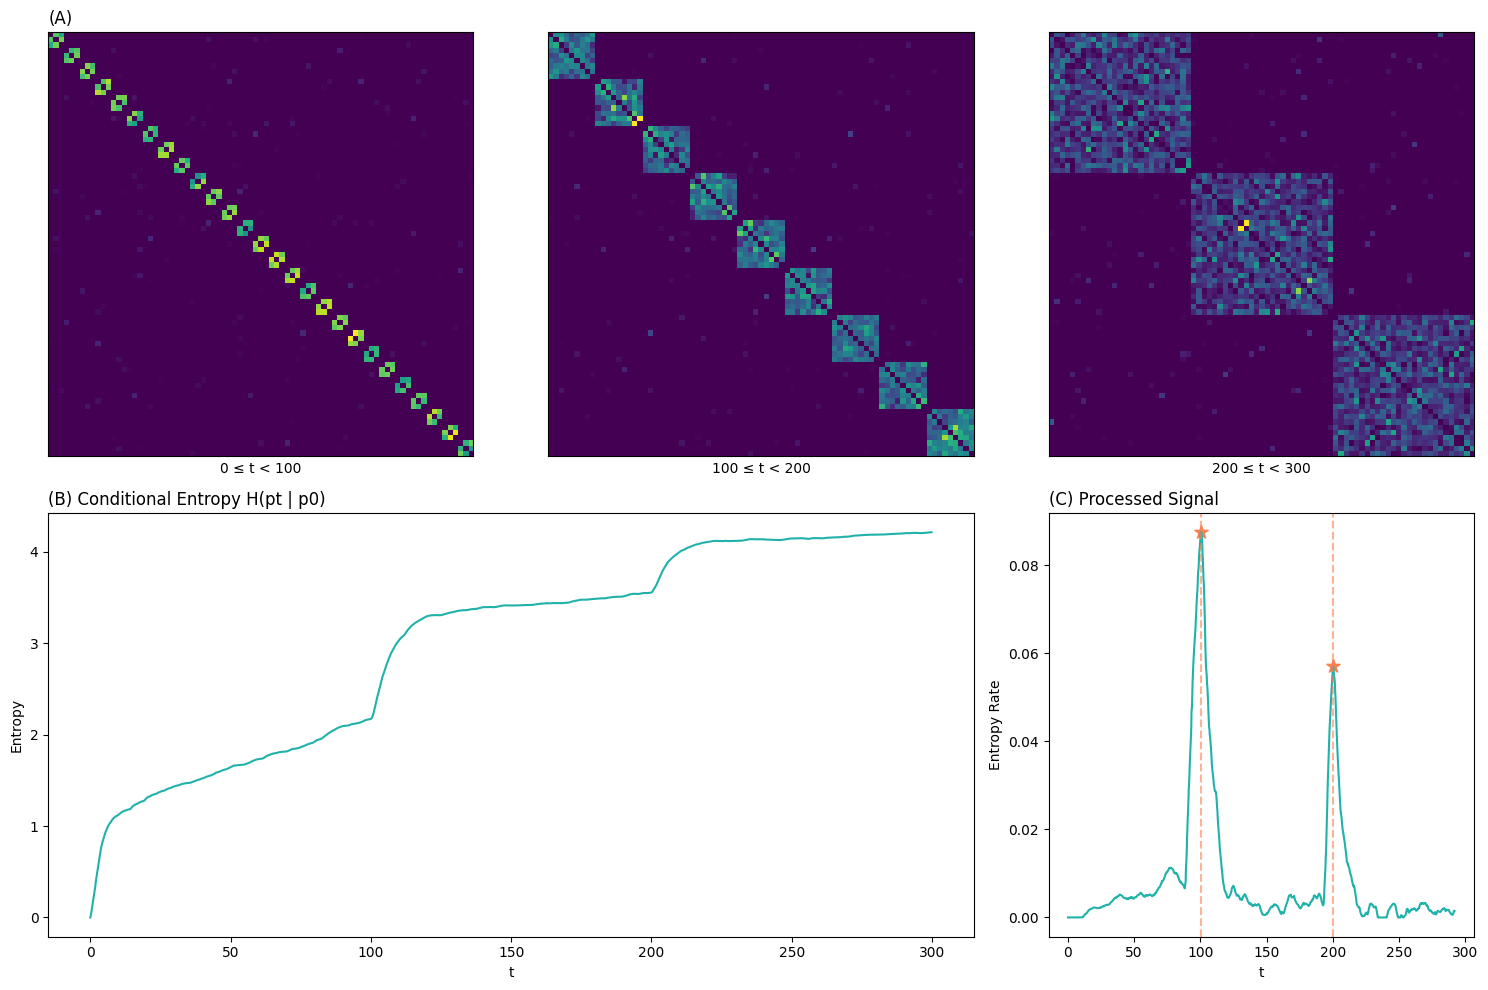

In [78]:
matrix1 = net_heat.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2 = net_heat.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3 = net_heat.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Time intervals for matrices
time_intervals = [(0, 100), (100, 200), (200, 300)]

# Start creating the figure
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])  # Grid: 2 rows, 3 columns

# Row 1: Matrices (A)
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]
for i, (ax, matrix, t_range) in enumerate(zip(axes, [matrix1, matrix2, matrix3], time_intervals)):
    im = ax.matshow(matrix, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{t_range[0]} ≤ t < {t_range[1]}", fontsize=10)
    ax.set_title(f"(A)", loc='left', fontsize=12) if i == 0 else None

# Row 2, Col 1: Conditional Entropy H(pt | p0) (B)
ax_b = fig.add_subplot(gs[1, 0:2])
color = 'lightseagreen'
index = 5
lamda = selected_lamdas[index]
smoothing_window = 50
S = Conditional_S_selected[index]

ax_b.plot(net_heat.times[sample_times], S, color=color, alpha=1)
ax_b.set_xlabel("t")
ax_b.set_ylabel("Entropy")
ax_b.set_title("(B) Conditional Entropy H(pt | p0)", loc='left', fontsize=12)

# Row 2, Col 3: Processed Signal (C)
ax_c = fig.add_subplot(gs[1, 2])
S = Conditional_S_selected[index]
dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)

local_window = 1000
maxima = find_local_maxima(np.array(dS_dt), local_window)

ax_c.plot(net_heat.times[sample_times][:-smoothing_window], np.maximum(0, dS_dt), color=color, alpha=1)
ax_c.scatter(net_heat.times[sample_times][maxima], np.maximum(0, dS_dt)[maxima], color="coral", marker="*", s=100, label="Local maxima")
for idx in maxima:
    ax_c.axvline(x=net_heat.times[sample_times][idx], color="coral", linestyle="--", alpha=0.6)

ax_c.set_xlabel("t")
ax_c.set_ylabel("Entropy Rate")
ax_c.set_title("(C) Processed Signal", loc='left', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


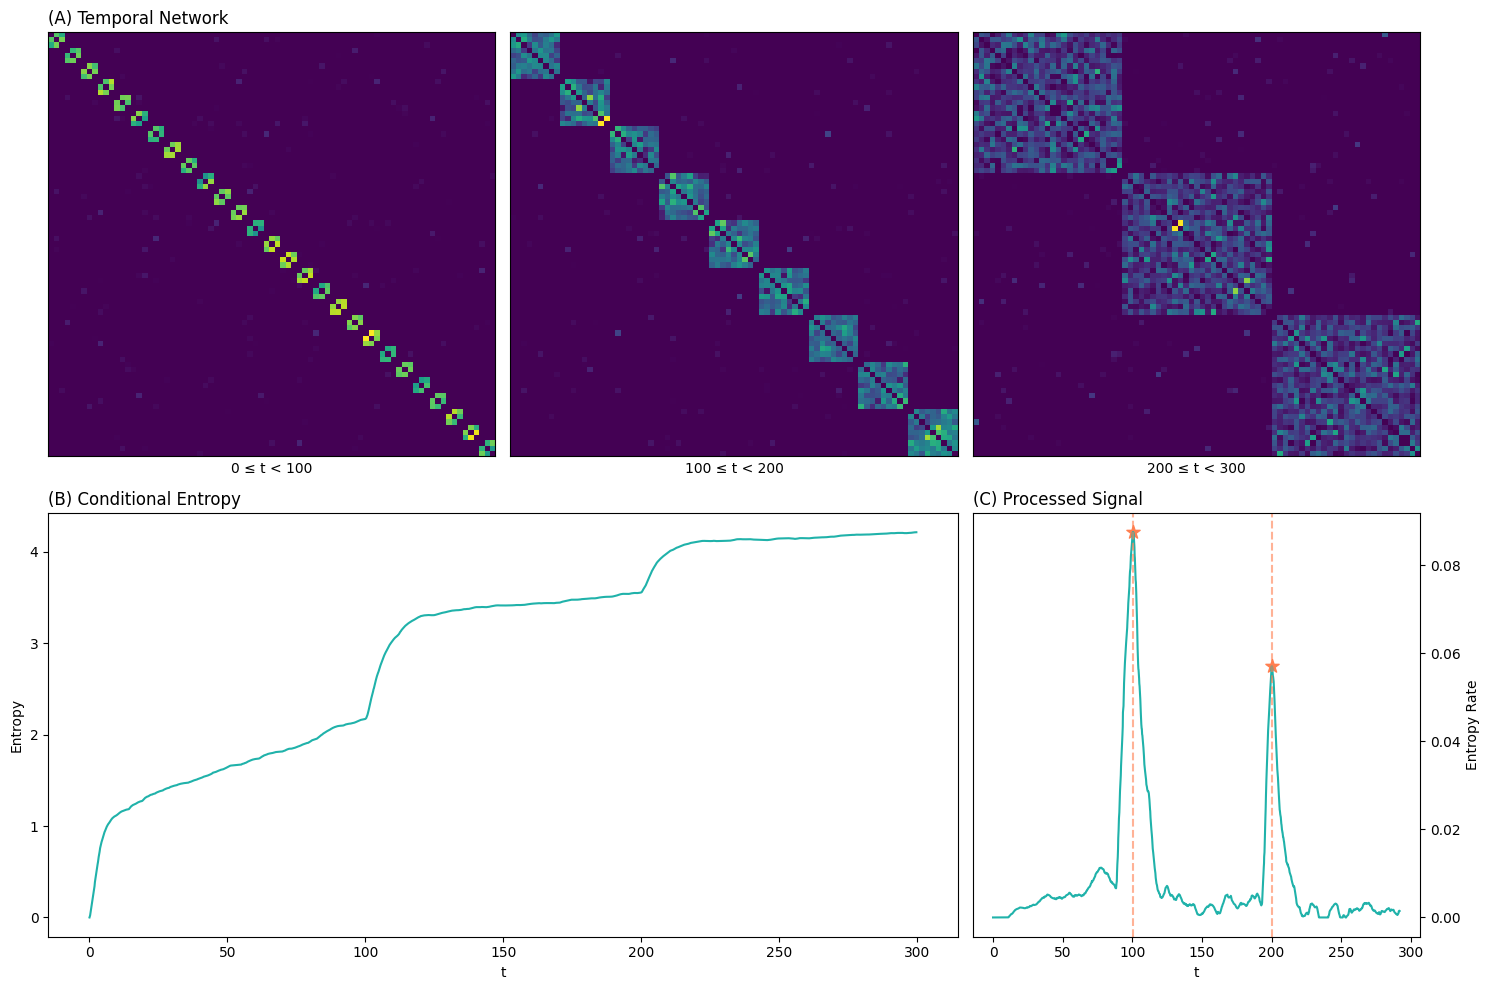

In [95]:
matrix1 = net_heat.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2 = net_heat.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3 = net_heat.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()

# Time intervals for matrices
time_intervals = [(0, 100), (100, 200), (200, 300)]

# Start creating the figure
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])  # Grid: 2 rows, 3 columns

# Row 1: Matrices (A)
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]
for i, (ax, matrix, t_range) in enumerate(zip(axes, [matrix1, matrix2, matrix3], time_intervals)):
    im = ax.matshow(matrix, aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{t_range[0]} ≤ t < {t_range[1]}", fontsize=10)
    ax.set_title(f"(A) Temporal Network", loc='left', fontsize=12) if i == 0 else None

# Row 2, Col 1: Conditional Entropy H(pt | p0) (B)
ax_b = fig.add_subplot(gs[1, 0:2])
color = 'lightseagreen'
index = 5
lamda = selected_lamdas[index]
smoothing_window = 50
S = Conditional_S_selected[index]

ax_b.plot(net_heat.times[sample_times], S, color=color, alpha=1)
ax_b.set_xlabel("t")
ax_b.set_ylabel("Entropy")
ax_b.set_title("(B) Conditional Entropy", loc='left', fontsize=12)

# Row 2, Col 3: Processed Signal (C)
ax_c = fig.add_subplot(gs[1, 2])
S = Conditional_S_selected[index]
dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)

local_window = 1000
maxima = find_local_maxima(np.array(dS_dt), local_window)

ax_c.plot(net_heat.times[sample_times][:-smoothing_window], np.maximum(0, dS_dt), color=color, alpha=1)
ax_c.scatter(net_heat.times[sample_times][maxima], np.maximum(0, dS_dt)[maxima], color="coral", marker="*", s=100, label="Local maxima")
for idx in maxima:
    ax_c.axvline(x=net_heat.times[sample_times][idx], ymax= 1, color="coral", linestyle="--", alpha=0.6)
ax_c.set_xlabel("t")
ax_c.set_ylabel("Entropy Rate")
ax_c.set_title("(C) Processed Signal", loc='left', fontsize=12)

# Move y-axis to the right
ax_c.yaxis.tick_right()
ax_c.yaxis.set_label_position("right")

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/growing300/figNetSci2025.eps', format='eps', dpi=300)
plt.show()


In [107]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

/tmp/ipykernel_114297/993784380.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


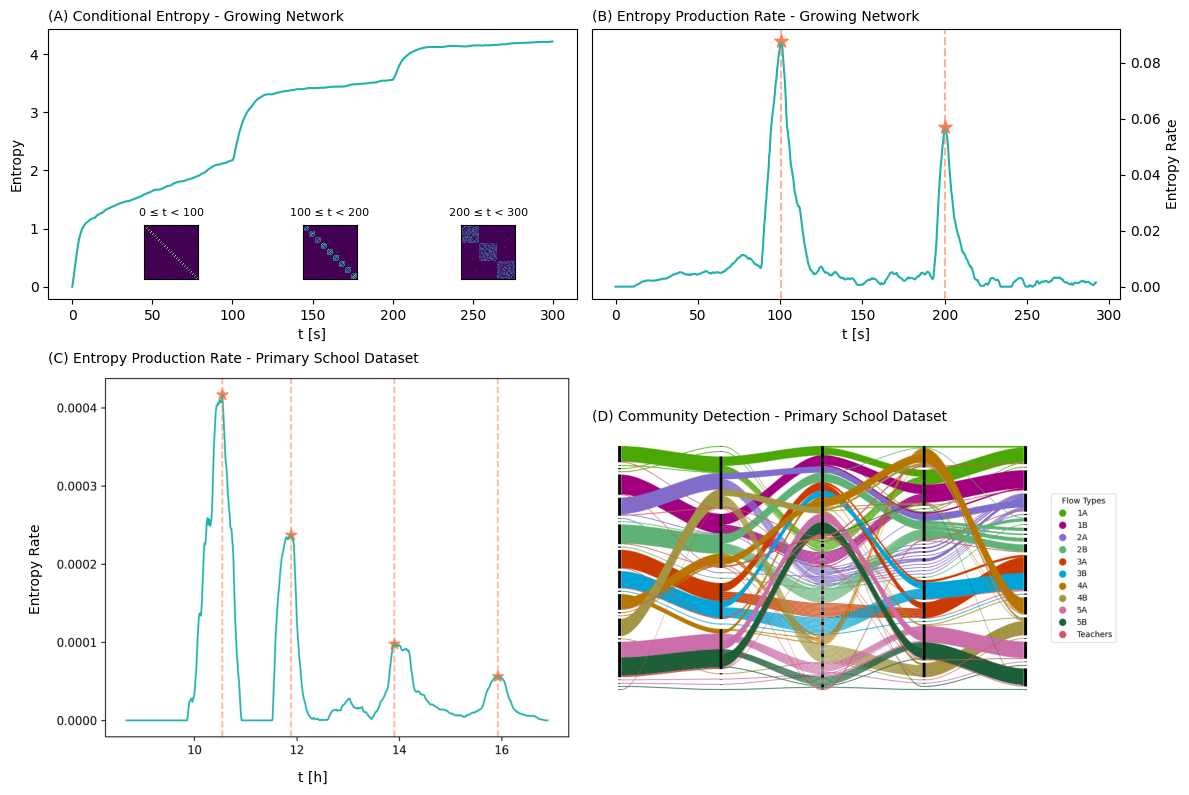

In [144]:
# Start creating the figure
fig = plt.figure(figsize=(12, 8))  # More elongated horizontally
gs = fig.add_gridspec(2, 2, height_ratios=[2, 3])  # Grid: 2 rows, 2 columns

# Row 1, Col 1: Plot A
ax_a = fig.add_subplot(gs[0, 0])
color = 'lightseagreen'
index = 5
smoothing_window = 50
S = Conditional_S_selected[index]

ax_a.plot(net_heat.times[sample_times], S, color=color, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Conditional Entropy - Growing Network", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2, matrix3]
positions = [0.12, 0.42, 0.72]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8)

# Row 1, Col 2: Plot B
ax_b = fig.add_subplot(gs[0, 1])
dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)

local_window = 1000
maxima = find_local_maxima(np.array(dS_dt), local_window)

ax_b.plot(net_heat.times[sample_times][:-smoothing_window], np.maximum(0, dS_dt), color=color, alpha=1)
ax_b.scatter(net_heat.times[sample_times][maxima], np.maximum(0, dS_dt)[maxima], color="coral", marker="*", s=100, label="Local maxima")
for idx in maxima:
    ax_b.axvline(x=net_heat.times[sample_times][idx], color="coral", linestyle="--", alpha=0.6)

ax_b.set_xlabel("t [s]")
ax_b.set_ylabel("Entropy Rate")
ax_b.set_title("(B) Entropy Production Rate - Growing Network", loc='left', fontsize=10)
ax_b.yaxis.tick_right()
ax_b.yaxis.set_label_position("right")

# Row 2, Col 1: Plot C
signal_primaryschool = mpimg.imread('/home/b/skoove/Desktop/primary_school/netsci2025.png')

ax_c = fig.add_subplot(gs[1, 0])
ax_c.imshow(signal_primaryschool)
ax_c.set_xlabel("t [h]")
ax_c.set_ylabel("Entropy Rate")
ax_c.set_title("(C) Entropy Production Rate - Primary School Dataset", loc='left', fontsize=10)
ax_c.set_xticks([])
ax_c.set_yticks([])
ax_c.set_frame_on(False)

# Row 2, Col 2: Plot D
sankey_primaryschool = mpimg.imread('/home/b/skoove/Desktop/primary_school/sankey_diagram_with_legend_sankeyflow.png')

ax_d = fig.add_subplot(gs[1, 1])  # Spans both columns
ax_d.imshow(sankey_primaryschool)
ax_d.set_title("(D) Community Detection - Primary School Dataset", loc='left', fontsize=10)
ax_d.set_xticks([])
ax_d.set_yticks([])
ax_d.set_frame_on(False)

# Adjust layout and display
plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/growing300/figNetSci2025_2.eps', format='eps', dpi=300)
plt.show()


/tmp/ipykernel_114297/1120717034.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


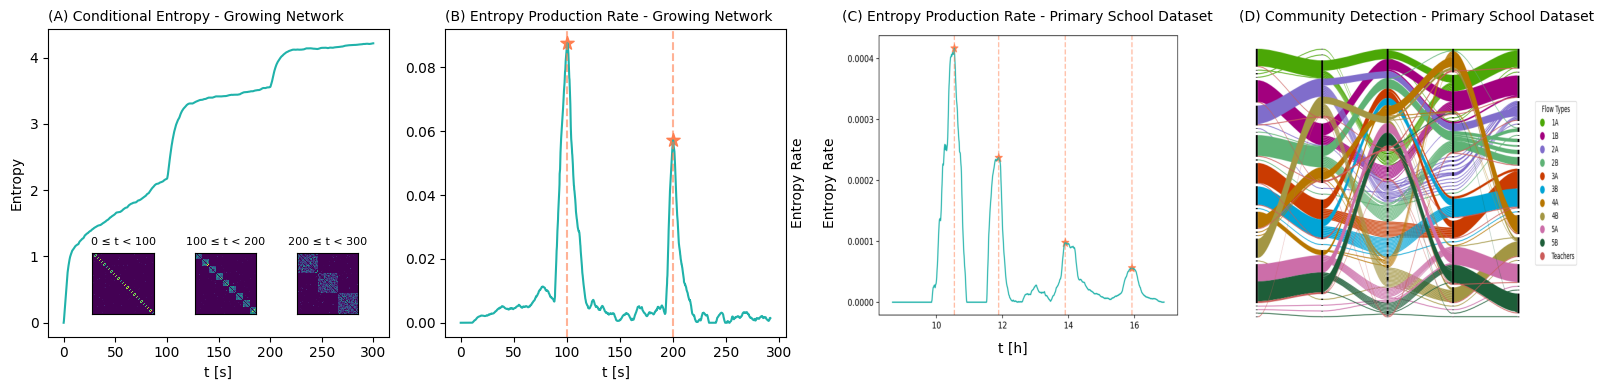

In [151]:
# Start creating the figure
fig = plt.figure(figsize=(16, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 4)  # Grid: 1 row, 4 columns

# Column 1: Plot A
ax_a = fig.add_subplot(gs[0, 0])
color = 'lightseagreen'
index = 5
smoothing_window = 50
S = Conditional_S_selected[index]

ax_a.plot(net_heat.times[sample_times], S, color=color, alpha=1)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("Entropy")
ax_a.set_title("(A) Conditional Entropy - Growing Network", loc='left', fontsize=10)

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2, matrix3]
positions = [0.10, 0.40, 0.70]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(ax_a, width="20%", height="20%", loc="lower left", 
                          bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax_a.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8)

# Column 2: Plot B
ax_b = fig.add_subplot(gs[0, 1])
dS_dt = auxiliary_functions.derivative([s - H(s) for s in S], net_heat.times[sample_times])
dS_dt = auxiliary_functions.running_mean(dS_dt, smoothing_window)

local_window = 1000
maxima = find_local_maxima(np.array(dS_dt), local_window)

ax_b.plot(net_heat.times[sample_times][:-smoothing_window], np.maximum(0, dS_dt), color=color, alpha=1)
ax_b.scatter(net_heat.times[sample_times][maxima], np.maximum(0, dS_dt)[maxima], color="coral", marker="*", s=100, label="Local maxima")
for idx in maxima:
    ax_b.axvline(x=net_heat.times[sample_times][idx], color="coral", linestyle="--", alpha=0.6)

ax_b.set_xlabel("t [s]")
ax_b.set_ylabel("Entropy Rate")
ax_b.set_title("(B) Entropy Production Rate - Growing Network", loc='left', fontsize=10)
#ax_b.yaxis.tick_right()
ax_b.yaxis.set_label_position("right")

# Column 3: Plot C (Square aspect ratio)
signal_primaryschool = mpimg.imread('/home/b/skoove/Desktop/primary_school/netsci2025.png')

ax_c = fig.add_subplot(gs[0, 2])
ax_c.imshow(signal_primaryschool, aspect='auto')  # Ensure square shape
ax_c.set_xlabel("t [h]")
ax_c.set_ylabel("Entropy Rate")
ax_c.set_title("(C) Entropy Production Rate - Primary School Dataset", loc='left', fontsize=10)
ax_c.set_xticks([])
ax_c.set_yticks([])
ax_c.set_frame_on(False)

# Column 4: Plot D (Square aspect ratio)
sankey_primaryschool = mpimg.imread('/home/b/skoove/Desktop/primary_school/sankey_diagram_with_legend_sankeyflow.png')

ax_d = fig.add_subplot(gs[0, 3])
ax_d.imshow(sankey_primaryschool, aspect='auto')  # Ensure square shape
ax_d.set_title("(D) Community Detection - Primary School Dataset", loc='left', fontsize=10)
ax_d.set_xticks([])
ax_d.set_yticks([])
ax_d.set_frame_on(False)

# Adjust layout and display
plt.tight_layout()
plt.savefig('/home/b/skoove/Desktop/growing300/figNetSci2025_row_squares.eps', format='eps', dpi=300)
plt.show()
